In [108]:
#Importamos las librerias con las que trabajaremos
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [76]:
#Cargamos el csv
df = pd.read_csv('simce.csv', encoding='latin-1')
df2 = pd.read_csv('promedio.csv', encoding='latin-1')

In [14]:
# Agrupamos regiones con las que trabajaremos
regiones_filtrar = [
    'tarapacá',
    'maule',
    'la araucanía',
    'aysén del general carlos ibáñez del campo',
    'magallanes y de la antártica chilena',
    'metropolitana'
]

In [20]:
 #Filtrar el DataFrame
df_filtrado = df[df['region'].str.lower().isin(regiones_filtrar)].copy()

In [24]:
#Tipos de datos y nombres de columnas
print(df_filtrado.dtypes)

agno             int64
region          object
provincia       object
comuna          object
lenguaje       float64
matematicas    float64
dtype: object


In [28]:
#Vemos la cantidad de columnas y filas
df.shape

(6507, 6)

In [32]:
#Vemos la completitud de los datos
print(df_filtrado.notnull().mean() * 100)

agno           100.0
region         100.0
provincia      100.0
comuna         100.0
lenguaje       100.0
matematicas    100.0
dtype: float64


## No es necesario imputar datos porque no hay valores perdidos; el dataset está completo.

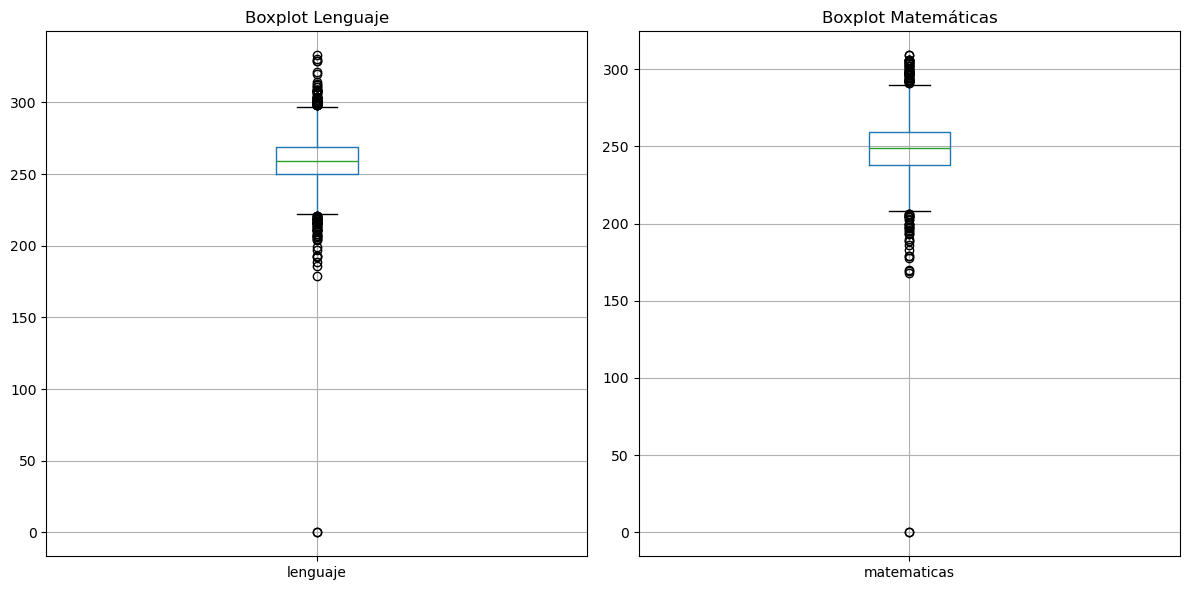

In [45]:
#Revisamos los outlayers con un scatterplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df_filtrado.boxplot(column='lenguaje')
plt.title('Boxplot Lenguaje')
plt.subplot(1, 2, 2)
df_filtrado.boxplot(column='matematicas')
plt.title('Boxplot Matemáticas')
plt.tight_layout()
plt.show()

In [49]:
#Revisamos los valores outlayers.
for col in ['lenguaje', 'matematicas']:
    Q1 = df_filtrado[col].quantile(0.25)
    Q3 = df_filtrado[col].quantile(0.75)
    IQR = Q3 - Q1
    filtro = (df_filtrado[col] < Q1 - 1.5 * IQR) | (df_filtrado[col] > Q3 + 1.5 * IQR)
    n_outliers = filtro.sum()
    porcentaje = filtro.mean() * 100
    print(f"{col}: {n_outliers} outliers ({porcentaje:.2f}%)")
    outliers = df_filtrado[filtro]

lenguaje: 131 outliers (4.93%)
matematicas: 103 outliers (3.87%)


## Al ser valores minimos bajo el 5% tomamos la desición de no imputar 


In [84]:
#Revisamos el DF de simce
print(df2.notnull().mean() * 100)

agno           100.0
lenguaje       100.0
matematicas    100.0
dtype: float64


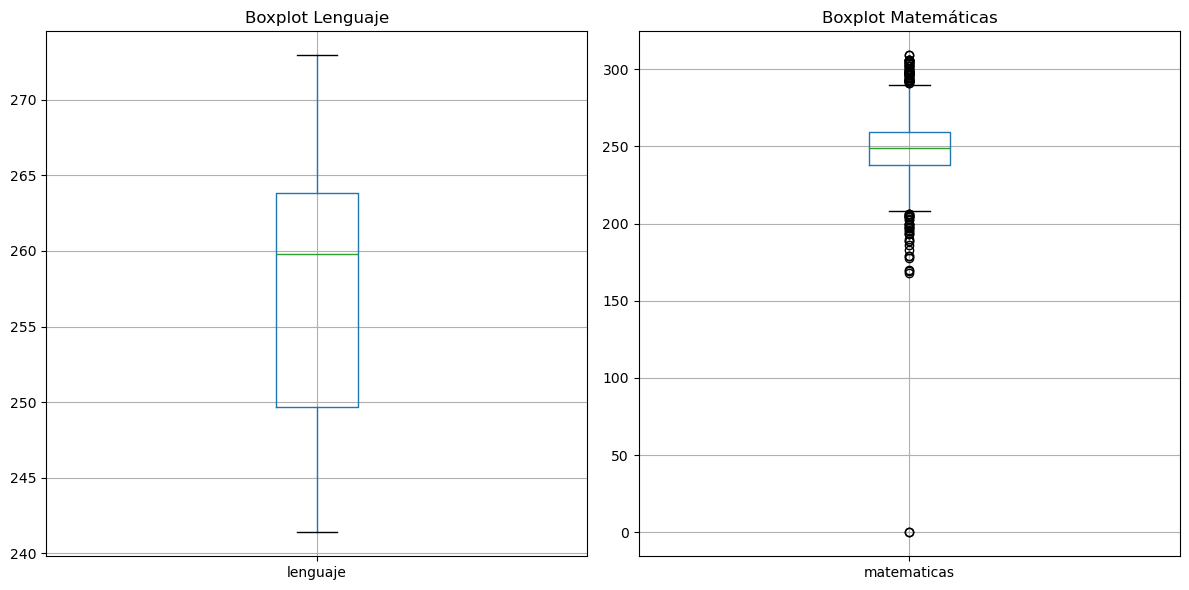

In [86]:
#Revisamos nulos
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df2.boxplot(column='lenguaje')
plt.title('Boxplot Lenguaje')
plt.subplot(1, 2, 2)
df_filtrado.boxplot(column='matematicas')
plt.title('Boxplot Matemáticas')
plt.tight_layout()
plt.show()

In [114]:
import numpy as np

def porcentaje_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < lower) | (df[columna] > upper)]
    porcentaje = 100 * len(outliers) / len(df)
    return porcentaje

# Ejemplo para 'lenguaje' y 'matematicas'
porc_out_leng = porcentaje_outliers(df2, 'lenguaje')
porc_out_mate = porcentaje_outliers(df2, 'matematicas')

print(f"Porcentaje de outliers en Lenguaje: {porc_out_leng:.2f}%")
print(f"Porcentaje de outliers en Matemáticas: {porc_out_mate:.2f}%")

Porcentaje de outliers en Lenguaje: 0.00%
Porcentaje de outliers en Matemáticas: 0.00%


## No imputaremos ya que los outlayers presentan 0%